# Mask RCNN - train rocks dataset
Zhiang Chen, Dec 5, 2018
#### 1. import libraries

In [1]:
import os
import sys
import random
import math
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

import rocks

Using TensorFlow backend.


#### 2. import dataset

In [2]:
config = rocks.RocksConfig()
config.display()

train_dataset = rocks.RocksDataset()
valid_dataset = rocks.RocksDataset()

train_dataset.load_rocks('../../dataset/rocks', 'train')
valid_dataset.load_rocks('../../dataset/rocks', 'val')

train_dataset.prepare()
valid_dataset.prepare()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        200
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL                  3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'rpn_bbox_loss': 1.0, 'rpn_class_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

#### 3. create network model

In [3]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [4]:
# the model will be saved under ../../logs
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [5]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

#### 4. training model

In [6]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE, 
            epochs=400, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /models/Mask_RCNN/logs/rocks20181206T0531/mask_rcnn_rocks_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4  

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/400
100/100 [==============================] - 63s 634ms/step - loss: 2.0688 - rpn_class_loss: 0.1420 - rpn_bbox_loss: 0.5659 - mrcnn_class_loss: 0.2265 - mrcnn_bbox_loss: 0.5730 - mrcnn_mask_loss: 0.5615 - val_loss: 1.5943 - val_rpn_class_loss: 0.0654 - val_rpn_bbox_loss: 0.7363 - val_mrcnn_class_loss: 0.1468 - val_mrcnn_bbox_loss: 0.3435 - val_mrcnn_mask_loss: 0.3023
Epoch 2/400
100/100 [==============================] - 53s 533ms/step - loss: 1.5504 - rpn_class_loss: 0.0829 - rpn_bbox_loss: 0.4195 - mrcnn_class_loss: 0.2284 - mrcnn_bbox_loss: 0.4216 - mrcnn_mask_loss: 0.3981 - val_loss: 1.4610 - val_rpn_class_loss: 0.0623 - val_rpn_bbox_loss: 0.6606 - val_mrcnn_class_loss: 0.1370 - val_mrcnn_bbox_loss: 0.3032 - val_mrcnn_mask_loss: 0.2980
Epoch 3/400
100/100 [==============================] - 53s 531ms/step - loss: 1.5170 - rpn_class_loss: 0.0796 - rpn_bbox_loss: 0.4211 - mrcnn_class_loss: 0.2408 - mrcnn_bbox_loss: 0.3939 - mrcnn_mask_loss: 0.3815 - val_loss: 1.4972 - val_rp

100/100 [==============================] - 53s 530ms/step - loss: 0.9620 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.2440 - mrcnn_class_loss: 0.1566 - mrcnn_bbox_loss: 0.2398 - mrcnn_mask_loss: 0.2888 - val_loss: 1.1276 - val_rpn_class_loss: 0.0286 - val_rpn_bbox_loss: 0.4280 - val_mrcnn_class_loss: 0.0808 - val_mrcnn_bbox_loss: 0.3021 - val_mrcnn_mask_loss: 0.2881
Epoch 44/400
100/100 [==============================] - 53s 533ms/step - loss: 0.9217 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.2434 - mrcnn_class_loss: 0.1328 - mrcnn_bbox_loss: 0.2253 - mrcnn_mask_loss: 0.2879 - val_loss: 1.3613 - val_rpn_class_loss: 0.0284 - val_rpn_bbox_loss: 0.3880 - val_mrcnn_class_loss: 0.1152 - val_mrcnn_bbox_loss: 0.4140 - val_mrcnn_mask_loss: 0.4157
Epoch 45/400
100/100 [==============================] - 53s 525ms/step - loss: 0.9497 - rpn_class_loss: 0.0356 - rpn_bbox_loss: 0.2750 - mrcnn_class_loss: 0.1477 - mrcnn_bbox_loss: 0.2166 - mrcnn_mask_loss: 0.2749 - val_loss: 1.4272 - val_rpn_class_lo

100/100 [==============================] - 52s 525ms/step - loss: 0.8764 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.2384 - mrcnn_class_loss: 0.1481 - mrcnn_bbox_loss: 0.1911 - mrcnn_mask_loss: 0.2681 - val_loss: 1.3186 - val_rpn_class_loss: 0.0283 - val_rpn_bbox_loss: 0.5397 - val_mrcnn_class_loss: 0.1039 - val_mrcnn_bbox_loss: 0.3271 - val_mrcnn_mask_loss: 0.3195
Epoch 86/400
100/100 [==============================] - 52s 523ms/step - loss: 0.8719 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.2156 - mrcnn_class_loss: 0.1503 - mrcnn_bbox_loss: 0.2000 - mrcnn_mask_loss: 0.2747 - val_loss: 1.2924 - val_rpn_class_loss: 0.0289 - val_rpn_bbox_loss: 0.5166 - val_mrcnn_class_loss: 0.1076 - val_mrcnn_bbox_loss: 0.3016 - val_mrcnn_mask_loss: 0.3378
Epoch 87/400
100/100 [==============================] - 53s 528ms/step - loss: 0.8179 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.2175 - mrcnn_class_loss: 0.1298 - mrcnn_bbox_loss: 0.1827 - mrcnn_mask_loss: 0.2593 - val_loss: 1.9027 - val_rpn_class_lo

100/100 [==============================] - 52s 524ms/step - loss: 0.7865 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.2068 - mrcnn_class_loss: 0.1182 - mrcnn_bbox_loss: 0.1713 - mrcnn_mask_loss: 0.2636 - val_loss: 1.3107 - val_rpn_class_loss: 0.0267 - val_rpn_bbox_loss: 0.4242 - val_mrcnn_class_loss: 0.0835 - val_mrcnn_bbox_loss: 0.4092 - val_mrcnn_mask_loss: 0.3670
Epoch 128/400
100/100 [==============================] - 53s 528ms/step - loss: 0.7101 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.1947 - mrcnn_class_loss: 0.0946 - mrcnn_bbox_loss: 0.1550 - mrcnn_mask_loss: 0.2392 - val_loss: 1.3753 - val_rpn_class_loss: 0.0296 - val_rpn_bbox_loss: 0.5175 - val_mrcnn_class_loss: 0.1098 - val_mrcnn_bbox_loss: 0.3346 - val_mrcnn_mask_loss: 0.3838
Epoch 129/400
100/100 [==============================] - 53s 527ms/step - loss: 0.7269 - rpn_class_loss: 0.0245 - rpn_bbox_loss: 0.1823 - mrcnn_class_loss: 0.1085 - mrcnn_bbox_loss: 0.1626 - mrcnn_mask_loss: 0.2489 - val_loss: 1.2349 - val_rpn_class_

100/100 [==============================] - 53s 528ms/step - loss: 0.6426 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.1729 - mrcnn_class_loss: 0.0897 - mrcnn_bbox_loss: 0.1302 - mrcnn_mask_loss: 0.2292 - val_loss: 1.3132 - val_rpn_class_loss: 0.0303 - val_rpn_bbox_loss: 0.4150 - val_mrcnn_class_loss: 0.1218 - val_mrcnn_bbox_loss: 0.3361 - val_mrcnn_mask_loss: 0.4100
Epoch 170/400
100/100 [==============================] - 52s 524ms/step - loss: 0.6834 - rpn_class_loss: 0.0241 - rpn_bbox_loss: 0.1776 - mrcnn_class_loss: 0.0997 - mrcnn_bbox_loss: 0.1441 - mrcnn_mask_loss: 0.2379 - val_loss: 1.6405 - val_rpn_class_loss: 0.0242 - val_rpn_bbox_loss: 0.6973 - val_mrcnn_class_loss: 0.0737 - val_mrcnn_bbox_loss: 0.4371 - val_mrcnn_mask_loss: 0.4082
Epoch 171/400
100/100 [==============================] - 53s 526ms/step - loss: 0.6842 - rpn_class_loss: 0.0240 - rpn_bbox_loss: 0.1734 - mrcnn_class_loss: 0.1019 - mrcnn_bbox_loss: 0.1442 - mrcnn_mask_loss: 0.2407 - val_loss: 1.4154 - val_rpn_class_

100/100 [==============================] - 53s 533ms/step - loss: 0.6327 - rpn_class_loss: 0.0232 - rpn_bbox_loss: 0.1377 - mrcnn_class_loss: 0.1039 - mrcnn_bbox_loss: 0.1340 - mrcnn_mask_loss: 0.2339 - val_loss: 1.3401 - val_rpn_class_loss: 0.0307 - val_rpn_bbox_loss: 0.4617 - val_mrcnn_class_loss: 0.1160 - val_mrcnn_bbox_loss: 0.3538 - val_mrcnn_mask_loss: 0.3778
Epoch 212/400
100/100 [==============================] - 53s 527ms/step - loss: 0.5829 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.1364 - mrcnn_class_loss: 0.0856 - mrcnn_bbox_loss: 0.1198 - mrcnn_mask_loss: 0.2201 - val_loss: 1.3889 - val_rpn_class_loss: 0.0273 - val_rpn_bbox_loss: 0.4924 - val_mrcnn_class_loss: 0.0740 - val_mrcnn_bbox_loss: 0.4008 - val_mrcnn_mask_loss: 0.3944
Epoch 213/400
100/100 [==============================] - 53s 530ms/step - loss: 0.6085 - rpn_class_loss: 0.0223 - rpn_bbox_loss: 0.1387 - mrcnn_class_loss: 0.0973 - mrcnn_bbox_loss: 0.1232 - mrcnn_mask_loss: 0.2270 - val_loss: 1.2404 - val_rpn_class_

100/100 [==============================] - 53s 532ms/step - loss: 0.6179 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 0.1436 - mrcnn_class_loss: 0.0981 - mrcnn_bbox_loss: 0.1247 - mrcnn_mask_loss: 0.2279 - val_loss: 1.4438 - val_rpn_class_loss: 0.0369 - val_rpn_bbox_loss: 0.5423 - val_mrcnn_class_loss: 0.0883 - val_mrcnn_bbox_loss: 0.3139 - val_mrcnn_mask_loss: 0.4624
Epoch 254/400
100/100 [==============================] - 53s 527ms/step - loss: 0.5926 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.1389 - mrcnn_class_loss: 0.0896 - mrcnn_bbox_loss: 0.1186 - mrcnn_mask_loss: 0.2236 - val_loss: 1.3327 - val_rpn_class_loss: 0.0298 - val_rpn_bbox_loss: 0.4693 - val_mrcnn_class_loss: 0.1181 - val_mrcnn_bbox_loss: 0.3066 - val_mrcnn_mask_loss: 0.4088
Epoch 255/400
100/100 [==============================] - 53s 531ms/step - loss: 0.6253 - rpn_class_loss: 0.0234 - rpn_bbox_loss: 0.1473 - mrcnn_class_loss: 0.1022 - mrcnn_bbox_loss: 0.1244 - mrcnn_mask_loss: 0.2280 - val_loss: 1.5365 - val_rpn_class_

100/100 [==============================] - 53s 533ms/step - loss: 0.5137 - rpn_class_loss: 0.0182 - rpn_bbox_loss: 0.1182 - mrcnn_class_loss: 0.0747 - mrcnn_bbox_loss: 0.0973 - mrcnn_mask_loss: 0.2053 - val_loss: 1.3490 - val_rpn_class_loss: 0.0302 - val_rpn_bbox_loss: 0.5081 - val_mrcnn_class_loss: 0.1269 - val_mrcnn_bbox_loss: 0.2919 - val_mrcnn_mask_loss: 0.3920
Epoch 296/400
100/100 [==============================] - 54s 536ms/step - loss: 0.5239 - rpn_class_loss: 0.0177 - rpn_bbox_loss: 0.1177 - mrcnn_class_loss: 0.0716 - mrcnn_bbox_loss: 0.1030 - mrcnn_mask_loss: 0.2138 - val_loss: 1.4248 - val_rpn_class_loss: 0.0283 - val_rpn_bbox_loss: 0.7131 - val_mrcnn_class_loss: 0.0765 - val_mrcnn_bbox_loss: 0.2524 - val_mrcnn_mask_loss: 0.3546
Epoch 297/400
100/100 [==============================] - 53s 534ms/step - loss: 0.5274 - rpn_class_loss: 0.0199 - rpn_bbox_loss: 0.1150 - mrcnn_class_loss: 0.0779 - mrcnn_bbox_loss: 0.1041 - mrcnn_mask_loss: 0.2105 - val_loss: 1.4766 - val_rpn_class_

100/100 [==============================] - 53s 532ms/step - loss: 0.4872 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 0.1014 - mrcnn_class_loss: 0.0675 - mrcnn_bbox_loss: 0.0935 - mrcnn_mask_loss: 0.2061 - val_loss: 1.6081 - val_rpn_class_loss: 0.0300 - val_rpn_bbox_loss: 0.5885 - val_mrcnn_class_loss: 0.1069 - val_mrcnn_bbox_loss: 0.3754 - val_mrcnn_mask_loss: 0.5073
Epoch 338/400
100/100 [==============================] - 53s 533ms/step - loss: 0.4855 - rpn_class_loss: 0.0185 - rpn_bbox_loss: 0.1059 - mrcnn_class_loss: 0.0691 - mrcnn_bbox_loss: 0.0923 - mrcnn_mask_loss: 0.1997 - val_loss: 1.7698 - val_rpn_class_loss: 0.0321 - val_rpn_bbox_loss: 0.6378 - val_mrcnn_class_loss: 0.0847 - val_mrcnn_bbox_loss: 0.4079 - val_mrcnn_mask_loss: 0.6072
Epoch 339/400
100/100 [==============================] - 53s 534ms/step - loss: 0.4714 - rpn_class_loss: 0.0180 - rpn_bbox_loss: 0.0868 - mrcnn_class_loss: 0.0737 - mrcnn_bbox_loss: 0.0884 - mrcnn_mask_loss: 0.2046 - val_loss: 1.7023 - val_rpn_class_

100/100 [==============================] - 53s 534ms/step - loss: 0.4789 - rpn_class_loss: 0.0198 - rpn_bbox_loss: 0.1026 - mrcnn_class_loss: 0.0717 - mrcnn_bbox_loss: 0.0845 - mrcnn_mask_loss: 0.2003 - val_loss: 1.6202 - val_rpn_class_loss: 0.0325 - val_rpn_bbox_loss: 0.5644 - val_mrcnn_class_loss: 0.1007 - val_mrcnn_bbox_loss: 0.4043 - val_mrcnn_mask_loss: 0.5184
Epoch 380/400
100/100 [==============================] - 53s 533ms/step - loss: 0.4524 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.0931 - mrcnn_class_loss: 0.0649 - mrcnn_bbox_loss: 0.0848 - mrcnn_mask_loss: 0.1933 - val_loss: 1.5073 - val_rpn_class_loss: 0.0291 - val_rpn_bbox_loss: 0.6270 - val_mrcnn_class_loss: 0.1284 - val_mrcnn_bbox_loss: 0.3125 - val_mrcnn_mask_loss: 0.4103
Epoch 381/400
100/100 [==============================] - 53s 531ms/step - loss: 0.4771 - rpn_class_loss: 0.0178 - rpn_bbox_loss: 0.1028 - mrcnn_class_loss: 0.0678 - mrcnn_bbox_loss: 0.0883 - mrcnn_mask_loss: 0.2004 - val_loss: 1.5535 - val_rpn_class_

In [ ]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=800, 
            layers="all")


Starting at epoch 400. LR=0.0001

Checkpoint Path: /models/Mask_RCNN/logs/rocks20181206T0531/mask_rcnn_rocks_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 401/800
100/100 [==============================] - 95s 953ms/step - loss: 0.4622 - rpn_class_loss: 0.0187 - rpn_bbox_loss: 0.1120 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0818 - mrcnn_mask_loss: 0.1866 - val_loss: 1.4903 - val_rpn_class_loss: 0.0289 - val_rpn_bbox_loss: 0.7439 - val_mrcnn_class_loss: 0.0869 - val_mrcnn_bbox_loss: 0.2288 - val_mrcnn_mask_loss: 0.4017
Epoch 402/800
100/100 [==============================] - 71s 705ms/step - loss: 0.4090 - rpn_class_loss: 0.0158 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0731 - mrcnn_mask_loss: 0.1854 - val_loss: 1.7120 - val_rpn_class_loss: 0.0259 - val_rpn_bbox_loss: 0.5933 - val_mrcnn_class_loss: 0.1027 - val_mrcnn_bbox_loss: 0.4098 - val_mrcnn_mask_loss: 0.5804
Epoch 403/800
100/100 [==============================] - 70s 703ms/step - loss: 0.4634 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.0901 - mrcnn_class_loss: 0.0710 - mrcnn_bbox_loss: 0.0839 - mrcnn_mask_loss: 0.2004 - val_loss: 1.5293 - 

100/100 [==============================] - 71s 706ms/step - loss: 0.3831 - rpn_class_loss: 0.0130 - rpn_bbox_loss: 0.0681 - mrcnn_class_loss: 0.0516 - mrcnn_bbox_loss: 0.0674 - mrcnn_mask_loss: 0.1831 - val_loss: 1.8602 - val_rpn_class_loss: 0.0317 - val_rpn_bbox_loss: 0.7295 - val_mrcnn_class_loss: 0.0855 - val_mrcnn_bbox_loss: 0.3947 - val_mrcnn_mask_loss: 0.6189
Epoch 444/800
100/100 [==============================] - 71s 706ms/step - loss: 0.3767 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.0588 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0664 - mrcnn_mask_loss: 0.1816 - val_loss: 1.7091 - val_rpn_class_loss: 0.0294 - val_rpn_bbox_loss: 0.6374 - val_mrcnn_class_loss: 0.1096 - val_mrcnn_bbox_loss: 0.3680 - val_mrcnn_mask_loss: 0.5647
Epoch 445/800
100/100 [==============================] - 71s 707ms/step - loss: 0.3752 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.0708 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.0621 - mrcnn_mask_loss: 0.1770 - val_loss: 1.7218 - val_rpn_class_

100/100 [==============================] - 71s 706ms/step - loss: 0.3371 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.0513 - mrcnn_class_loss: 0.0444 - mrcnn_bbox_loss: 0.0586 - mrcnn_mask_loss: 0.1706 - val_loss: 1.5244 - val_rpn_class_loss: 0.0280 - val_rpn_bbox_loss: 0.8982 - val_mrcnn_class_loss: 0.0752 - val_mrcnn_bbox_loss: 0.1766 - val_mrcnn_mask_loss: 0.3463
Epoch 486/800
100/100 [==============================] - 71s 707ms/step - loss: 0.3410 - rpn_class_loss: 0.0116 - rpn_bbox_loss: 0.0495 - mrcnn_class_loss: 0.0493 - mrcnn_bbox_loss: 0.0574 - mrcnn_mask_loss: 0.1732 - val_loss: 1.5444 - val_rpn_class_loss: 0.0364 - val_rpn_bbox_loss: 0.6650 - val_mrcnn_class_loss: 0.1159 - val_mrcnn_bbox_loss: 0.2496 - val_mrcnn_mask_loss: 0.4775
Epoch 487/800
100/100 [==============================] - 71s 711ms/step - loss: 0.3486 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.0584 - mrcnn_class_loss: 0.0473 - mrcnn_bbox_loss: 0.0576 - mrcnn_mask_loss: 0.1732 - val_loss: 1.7654 - val_rpn_class_

100/100 [==============================] - 71s 707ms/step - loss: 0.3317 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.0532 - mrcnn_class_loss: 0.0429 - mrcnn_bbox_loss: 0.0555 - mrcnn_mask_loss: 0.1680 - val_loss: 2.0445 - val_rpn_class_loss: 0.0247 - val_rpn_bbox_loss: 0.7431 - val_mrcnn_class_loss: 0.0873 - val_mrcnn_bbox_loss: 0.4336 - val_mrcnn_mask_loss: 0.7559
Epoch 528/800
100/100 [==============================] - 71s 710ms/step - loss: 0.3232 - rpn_class_loss: 0.0113 - rpn_bbox_loss: 0.0432 - mrcnn_class_loss: 0.0428 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.1750 - val_loss: 1.4727 - val_rpn_class_loss: 0.0421 - val_rpn_bbox_loss: 0.5930 - val_mrcnn_class_loss: 0.1224 - val_mrcnn_bbox_loss: 0.2609 - val_mrcnn_mask_loss: 0.4542
Epoch 529/800
100/100 [==============================] - 71s 711ms/step - loss: 0.3261 - rpn_class_loss: 0.0121 - rpn_bbox_loss: 0.0603 - mrcnn_class_loss: 0.0403 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.1614 - val_loss: 2.2289 - val_rpn_class_

100/100 [==============================] - 71s 709ms/step - loss: 0.2804 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.0400 - mrcnn_class_loss: 0.0336 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.1522 - val_loss: 2.0470 - val_rpn_class_loss: 0.0305 - val_rpn_bbox_loss: 0.7191 - val_mrcnn_class_loss: 0.0734 - val_mrcnn_bbox_loss: 0.3815 - val_mrcnn_mask_loss: 0.8425
Epoch 570/800
100/100 [==============================] - 71s 713ms/step - loss: 0.2958 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.0362 - mrcnn_class_loss: 0.0397 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.1611 - val_loss: 1.8817 - val_rpn_class_loss: 0.0377 - val_rpn_bbox_loss: 0.6464 - val_mrcnn_class_loss: 0.1161 - val_mrcnn_bbox_loss: 0.3657 - val_mrcnn_mask_loss: 0.7158
Epoch 571/800
100/100 [==============================] - 71s 710ms/step - loss: 0.2800 - rpn_class_loss: 0.0094 - rpn_bbox_loss: 0.0365 - mrcnn_class_loss: 0.0351 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.1520 - val_loss: 1.8507 - val_rpn_class_

100/100 [==============================] - 71s 710ms/step - loss: 0.2876 - rpn_class_loss: 0.0106 - rpn_bbox_loss: 0.0342 - mrcnn_class_loss: 0.0381 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.1566 - val_loss: 1.6907 - val_rpn_class_loss: 0.0340 - val_rpn_bbox_loss: 0.6496 - val_mrcnn_class_loss: 0.1237 - val_mrcnn_bbox_loss: 0.2952 - val_mrcnn_mask_loss: 0.5881
Epoch 612/800
100/100 [==============================] - 71s 710ms/step - loss: 0.2916 - rpn_class_loss: 0.0095 - rpn_bbox_loss: 0.0362 - mrcnn_class_loss: 0.0383 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.1586 - val_loss: 1.9406 - val_rpn_class_loss: 0.0320 - val_rpn_bbox_loss: 0.7425 - val_mrcnn_class_loss: 0.0875 - val_mrcnn_bbox_loss: 0.3918 - val_mrcnn_mask_loss: 0.6868
Epoch 613/800
100/100 [==============================] - 71s 708ms/step - loss: 0.3115 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.0467 - mrcnn_class_loss: 0.0429 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.1623 - val_loss: 1.8711 - val_rpn_class_

100/100 [==============================] - 71s 706ms/step - loss: 0.2840 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.0368 - mrcnn_class_loss: 0.0373 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.1555 - val_loss: 2.0546 - val_rpn_class_loss: 0.0304 - val_rpn_bbox_loss: 0.7336 - val_mrcnn_class_loss: 0.0910 - val_mrcnn_bbox_loss: 0.4034 - val_mrcnn_mask_loss: 0.7963
Epoch 654/800
100/100 [==============================] - 71s 710ms/step - loss: 0.2836 - rpn_class_loss: 0.0092 - rpn_bbox_loss: 0.0347 - mrcnn_class_loss: 0.0368 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.1575 - val_loss: 1.7946 - val_rpn_class_loss: 0.0396 - val_rpn_bbox_loss: 0.7246 - val_mrcnn_class_loss: 0.0940 - val_mrcnn_bbox_loss: 0.2932 - val_mrcnn_mask_loss: 0.6433
Epoch 655/800
100/100 [==============================] - 71s 708ms/step - loss: 0.2583 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.0285 - mrcnn_class_loss: 0.0319 - mrcnn_bbox_loss: 0.0403 - mrcnn_mask_loss: 0.1495 - val_loss: 2.0779 - val_rpn_class_

100/100 [==============================] - 80s 800ms/step - loss: 0.2738 - rpn_class_loss: 0.0077 - rpn_bbox_loss: 0.0311 - mrcnn_class_loss: 0.0350 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.1559 - val_loss: 2.2666 - val_rpn_class_loss: 0.0338 - val_rpn_bbox_loss: 0.8539 - val_mrcnn_class_loss: 0.0637 - val_mrcnn_bbox_loss: 0.4026 - val_mrcnn_mask_loss: 0.9125
Epoch 696/800
100/100 [==============================] - 79s 787ms/step - loss: 0.2756 - rpn_class_loss: 0.0079 - rpn_bbox_loss: 0.0349 - mrcnn_class_loss: 0.0340 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.1556 - val_loss: 2.0300 - val_rpn_class_loss: 0.0352 - val_rpn_bbox_loss: 0.6673 - val_mrcnn_class_loss: 0.1517 - val_mrcnn_bbox_loss: 0.3450 - val_mrcnn_mask_loss: 0.8309
Epoch 697/800
100/100 [==============================] - 79s 791ms/step - loss: 0.2669 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.0303 - mrcnn_class_loss: 0.0320 - mrcnn_bbox_loss: 0.0413 - mrcnn_mask_loss: 0.1542 - val_loss: 1.9041 - val_rpn_class_

100/100 [==============================] - 80s 798ms/step - loss: 0.2646 - rpn_class_loss: 0.0098 - rpn_bbox_loss: 0.0334 - mrcnn_class_loss: 0.0313 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.1493 - val_loss: 2.2373 - val_rpn_class_loss: 0.0342 - val_rpn_bbox_loss: 0.7227 - val_mrcnn_class_loss: 0.1194 - val_mrcnn_bbox_loss: 0.4456 - val_mrcnn_mask_loss: 0.9154
Epoch 738/800
100/100 [==============================] - 78s 778ms/step - loss: 0.2474 - rpn_class_loss: 0.0078 - rpn_bbox_loss: 0.0277 - mrcnn_class_loss: 0.0313 - mrcnn_bbox_loss: 0.0366 - mrcnn_mask_loss: 0.1441 - val_loss: 1.8733 - val_rpn_class_loss: 0.0426 - val_rpn_bbox_loss: 0.7822 - val_mrcnn_class_loss: 0.1184 - val_mrcnn_bbox_loss: 0.2969 - val_mrcnn_mask_loss: 0.6332
Epoch 739/800
100/100 [==============================] - 71s 708ms/step - loss: 0.2553 - rpn_class_loss: 0.0074 - rpn_bbox_loss: 0.0273 - mrcnn_class_loss: 0.0320 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.1475 - val_loss: 1.7862 - val_rpn_class_

In [8]:
class InferenceConfig(rocks.RocksConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model_pred = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "logs/rocks20181206T0531/mask_rcnn_rocks_0800.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model_pred.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/logs/rocks20181206T0531/mask_rcnn_rocks_0800.h5
Re-starting from epoch 800


In [10]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

original_image           shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  400.00000  float64
gt_class_id              shape: (13,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (13, 4)               min:    4.00000  max:  383.00000  int32
gt_mask                  shape: (384, 384, 13)        min:    0.00000  max:    1.00000  bool


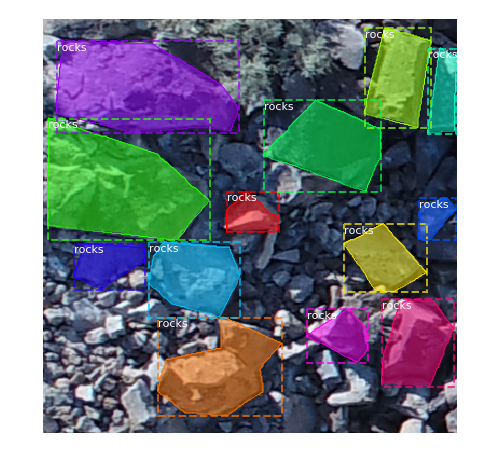

Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.47264  max:    1.30553  float32


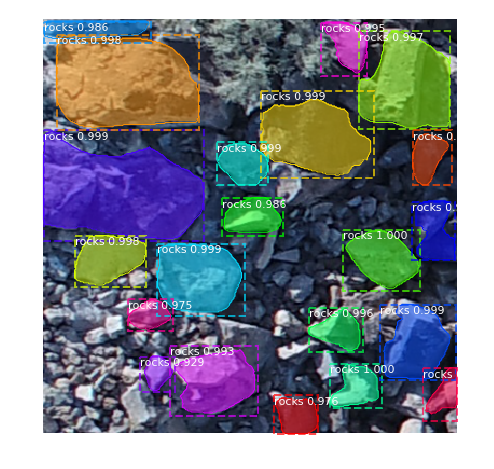

In [22]:
image_id = random.choice(valid_dataset.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(valid_dataset, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image = visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            train_dataset.class_names, figsize=(8, 8))

results = model_pred.detect([original_image], verbose=1)

r = results[0]
image = visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            valid_dataset.class_names, r['scores'], ax=get_ax())